In [39]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

df = pd.read_csv('Thesis Tracking Data 20230919.csv')
df.columns

Index(['Day_of_Week', 'Timestamp', 'Altitude', 'Course', 'Course_Accuracy',
       'H_Accuracy', 'Latitude', 'Longitude', 'Speed', 'Speed_Accuracy',
       'V_Accuracy'],
      dtype='object')

In [24]:
df # 1982

,Day_of_Week,Timestamp,Altitude,Course,Course_Accuracy,H_Accuracy,Latitude,Longitude,Speed,Speed_Accuracy,V_Accuracy
0,Tuesday,2023-09-19 06:14:58 +0000,57.150710,268.967959,53.392414,4.798054,14.637844,121.074774,1.483773,1.837906,3.286824
1,Tuesday,2023-09-19 06:14:59 +0000,57.661554,284.771512,56.987203,4.790059,14.637848,121.074760,1.438743,1.797271,3.298465
2,Tuesday,2023-09-19 06:15:00 +0000,58.041194,308.445080,44.045193,4.786969,14.637866,121.074750,2.069808,1.644483,3.302947
3,Tuesday,2023-09-19 06:15:01 +0000,58.118077,330.189030,39.067568,4.782355,14.637893,121.074740,2.376904,1.658320,3.309625
4,Tuesday,2023-09-19 06:15:02 +0000,58.171827,356.336398,33.997346,4.786269,14.637924,121.074750,2.580006,1.808512,3.303962
...,...,...,...,...,...,...,...,...,...,...,...
2254,Tuesday,2023-09-19 06:56:16 +0000,66.994324,126.289416,32.184725,4.732405,14.640040,121.078466,1.719947,1.161108,3.380662
2255,Tuesday,2023-09-19 06:56:17 +0000,67.146454,123.185767,39.722299,4.734499,14.640038,121.078477,1.354197,1.171594,3.377729
2256,Tuesday,2023-09-19 06:56:18 +0000,67.133595,113.524917,41.972852,4.743797,14.640041,121.078492,1.298960,1.226130,3.364658
2257,Tuesday,2023-09-19 06:56:20 +0000,66.995704,112.707423,87.503990,4.742495,14.640047,121.078511,0.596955,1.241574,3.366494


Text(0, 0.5, 'Latitude')

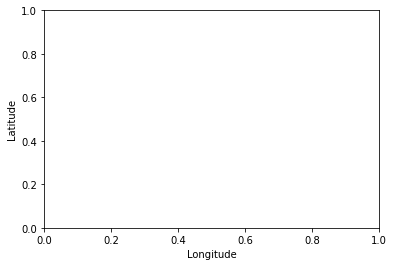

In [41]:
# df = df.head(2260)

df = df.astype({'Latitude': 'string', 'Longitude': 'string'})

train_df = df.head(2050)
test_df = df.tail(208)

plt.xlabel("Longitude") 
plt.ylabel("Latitude") 
# plt.plot(new_df['Longitude'],new_df['Latitude']) 
# plt.show()

In [33]:
# Create a Transformers model
model = AutoModelForSeq2SeqLM.from_pretrained('t5-small')


In [44]:
lat_train = train_df['Latitude']
long_train = train_df['Longitude']

lat_test = test_df['Latitude']
long_test = test_df['Longitude']

lat_test

tokenizer = AutoTokenizer.from_pretrained('t5-small')
#input_tokens = tokenizer.encode((lat_train, long_train), return_tensors='pt')
#output_tokens = tokenizer.encode((lat_test, long_test), return_tensors='pt')

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epoch_num = 100

for epoch in range(epoch_num):
    model.train()
    optimizer.zero_grad()

    outputs = model(lat_train)

    loss = criterion(outputs.logits, lat_train)

    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    print(f"Epoch [{epoch+1}/{epoch_num}], Loss: {loss.item()}")

# Inference for forecasting
with torch.no_grad():
    # Generate predictions
    predicted_tokens = model.generate(lat_test)

# Decode the predicted tokens to get the forecasted values
predicted_values = tokenizer.decode(predicted_tokens[0])
print("Forecasted values:", predicted_values)

TypeError: 'int' object is not callable

In [ ]:
inputs = df[['Latitude', 'Longitude']].values.tolist()
outputs = df[['Latitude', 'Longitude']].shift(-1).dropna().values.tolist()

tokenizer = AutoTokenizer.from_pretrained('t5-small')

input_tokens = tokenizer(inputs, return_tensors='pt', padding=True, truncation=True)
output_tokens = tokenizer(outputs, return_tensors='pt', padding=True, truncation=True)